# Water quality (Machine Learning)
Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


Helps interface with the os

In [2]:
import os
print(os.listdir(r"D:\Water quality machine learning"))

['waterquality.csv', 'water_dataX.csv']


Reading the data

In [3]:
data=pd.read_csv(r'D:\Water quality machine learning\water_dataX.csv',encoding="ISO-8859-1", na_values='?')

In [4]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


Checking the data types

In [5]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [6]:
# Changing the datatypes to numeric
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [7]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |           py37_0         3.1 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                                        4.8.4-py37_0 --> 4.8.5-py37_0




conda-4.8.5          | 3.1 MB    |            |   0% 
conda-4.8.5          | 3.1 MB    |            |   1% 
conda-4.8.5          | 3.1 MB    | 5          |   6% 
conda-4.8.5          | 3.1 MB    | #          |  11% 
conda-4.8.5          | 3.1 MB    | #7         |  17% 
conda-4.8.5          | 3.1 MB    | ##4        |  24% 
conda-4.8.5          | 3.1 MB    | ###2       |  32% 
conda-4.8.5

In [9]:
start=1
end=1990
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [10]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


In [11]:
data['LOCATIONS'][1]
columns = ['STATION CODE','LOCATIONS','STATE','Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']

In [12]:
data.isna()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,False,False,False,True,False,False,False,False,False,False,False,False
1987,False,False,False,False,False,False,False,False,False,False,False,False
1988,False,False,False,False,False,False,False,False,True,True,False,False
1989,False,False,False,False,False,False,False,False,True,True,False,False


In [17]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data.head()
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [18]:
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,NaN,2014,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100,4049.0,2014,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,7.0,136.0,7.5,1.4,0.609,205.0,2003,0,100,60,100,100,100
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,738.0,7.2,2.7,0.518,202.0,2003,0,100,60,100,100,100
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,585.0,6.3,2.6,0.155,315.0,2003,0,100,60,100,100,100
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,98.0,6.2,1.2,NaN,570.0,2003,0,100,40,100,100,0


In [19]:
SipH = 7.5
SiBOD = 1
SiNa = 20
SiCO = 4
SiDO = 10
SiEC = 75

In [20]:
ReciSi= 1/SipH + 1/SiBOD + 1/SiNa + 1/SiCO + 1/SiDO + 1/SiEC 
k= 1/ReciSi

In [21]:
wipH = k/SipH 
wiBOD= k/SiBOD
wiNa = k/SiNa
wiCO = k/SiCO
wiDO = k/SiDO
wiEC = k/SiEC

In [22]:
SmWi = wipH+wiBOD+wiNa+wiCO+wiDO+wiEC

In [23]:
WipH = wipH/SmWi
WiBOD= wiBOD/SmWi
WiNa = wiNa/SmWi
WiCO = wiCO/SmWi
WiDO = wiDO/SmWi
WiEC = wiEC/SmWi
print (WipH, WiBOD, WiNa, WiCO, WiDO, WiEC)

0.08620689655172414 0.646551724137931 0.032327586206896554 0.16163793103448276 0.06465517241379311 0.008620689655172414


In [52]:
data['wph']=data.npH * WipH
data['wdo']=data.ndo * WiDO
data['wbdo']=data.nbdo * WiBOD
data['wec']=data.nec* WiEC
data['wna']=data.nna * WiNa
data['wco']=data.nco * WiCO
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
df1  = data.drop(['do','ph','co','bod','na','tc','year'],axis =1)


In [61]:
dataframe = df1.drop(['wdo','wbdo','wec','wna','wco','wph'],axis =1)

columns = ['ndo','npH','nco','nbdo','nna','nec']
labels = columns
corr_matrix = dataframe.corr()
corr_matrix

,npH,ndo,nco,nbdo,nec,nna,wqi
npH,1.000000,-0.011273,-0.062893,-0.110170,-0.287076,0.015955,0.061681
ndo,-0.011273,1.000000,0.314043,0.445919,0.351281,-0.004743,0.542641
nco,-0.062893,0.314043,1.000000,0.388546,0.288223,-0.133494,0.576657
nbdo,-0.110170,0.445919,0.388546,1.000000,0.413568,0.039971,0.953277
nec,-0.287076,0.351281,0.288223,0.413568,1.000000,-0.053283,0.411911
nna,0.015955,-0.004743,-0.133494,0.039971,-0.053283,1.000000,0.063477
wqi,0.061681,0.542641,0.576657,0.953277,0.411911,0.063477,1.000000


In [62]:
dum = ['station','location','state']
data[dum]

,station,location,state
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
2,1475,ZUARI AT PANCHAWADI,GOA
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA
...,...,...,...
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN


In [63]:
df_dummy = pd.get_dummies(data[dum])
df = pd.concat([data, df_dummy], axis = 1)

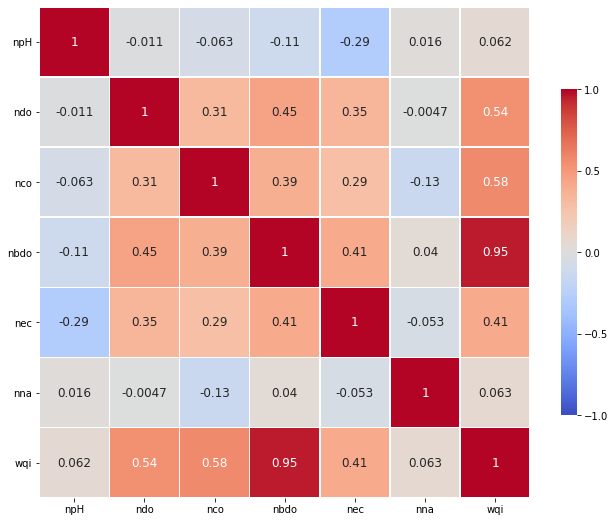

In [64]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})